In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv, qr
from random import normalvariate
import random

NumPy(Numerical Python的简称)是高性能科学计算和数据分析的基础包。它是本书所介绍的几乎多有高级工具的构建基础。<br>
- ndarry，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组
- 用于对整组数据进行快速运算的标准数学函数（无需编写循环）
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具
- 线性代数、随机数生成以及傅里叶变换功能
- 用于集成由C、C++、Fortran等语言编写的代码的工具<br>
最后一点也是从生态系统角度来看最重要的一点。由于NumPy提供了一个简单易用的CAPI，因此很容易将数据传递给由低级语言编写的外部库，外部库也能以NumPy数组的形式将数据返回给Python。这个功能使Python成为一种包装C/C++/Fortran历史代码库的选择，并使被包装库拥有一个动态的、易用的接口。<br>
NumPy本身并没有提供多么高级的数据分析功能，理解NumPy数组以及面向数组的计算将有助于你更加高效的使用诸如pandas之类的工具。如果你是Python新手，而且只是想用pandas随便处理一下数据就行，那就跳过本章吧，没关系的。<br>
对于大部分数据分析应用而言，我最关注的功能主要集中在：
- 用于数据整理和清理、自己构造和过滤、转换等快速的矢量化数组运算
- 常用的数组算法，如排序、唯一化、集合运算等
- 高效的描述统计和数据聚合/摘要运算
- 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算
- 将条件逻辑表述为数组表达式（而不是带有if-elif-else分支的循环）
- 数据的分组运算（聚合、转换、函数应用等）<br>
虽然NumPy提供能计算基础，但你可能还是想将pandas作为数据分析工作的基础，尤其是对于结构化或者表格数据，因为它提供了能使大部分常见数据任务变得非常简洁的丰富高级接口。pandas还提供了一些NumPy所没有的更加特定领域的功能，如时间序列处理等。

# NumPy的ndarray:一种多维数组对象

NumPy最重要的一个特点就是其N维数组对象（即ndarray），该对象式一个快速而灵活的大数据容器。你可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样

## 创建ndarray

创建数组最简单的办法是使用array函数。它接受一切序列的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。以一个列表的转换为例：

In [7]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组：

In [3]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [4]:
arr2.ndim

2

In [5]:
arr2.shape

(2, 4)

除非显式说明（稍后将会详细介绍），np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的dtype对象中。比如说，在上面的两个例子中，我们有：

In [8]:
arr1.dtype

dtype('float64')

In [9]:
arr2.dtype

dtype('int32')

除np.array之外，还有一些函数也可以新建数组。比如，zeros和ones分别可以创建指定长度或形状的全0或1数组。empyt可以创建一个没有任何具体数值的数组，只需传入一个表示形状的元组即可：

In [10]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
np.empty((2, 3, 4))

array([[[6.23042070e-307, 1.69118108e-306, 2.04722549e-306,
         6.23054972e-307],
        [8.45593934e-307, 7.56593017e-307, 1.69120552e-306,
         1.24611470e-306],
        [8.01097889e-307, 1.78020169e-306, 7.56601165e-307,
         1.02359984e-306]],

       [[1.11259940e-306, 1.11261774e-306, 1.78019625e-306,
         1.11261774e-306],
        [1.78019625e-306, 1.11261774e-306, 1.78019625e-306,
         1.24610994e-306],
        [1.11261570e-306, 1.37961302e-306, 1.11260280e-306,
         8.34451079e-308]]])

认为np.empty会返回全0数组的想法是不安全的。很多情况下，它返回的都是一些为初始化的垃圾值。

arange是Python内置函数range的数组版：

In [13]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

表中列出了一些数组创建函数。由于NumPy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是float64

|函数|说明|
|----|----|
|array|将输入数据（列表、元组、数组或其他序列类型）转换为ndarray。要么推断出dtype，要么显式指定dtype。默认直接复制输入数据|
|asarray|将输入转换为ndarray，如果输入本身就是一个ndarray就不进行复制|
|arange|类似于内置的range，但返回的是一个ndarray而不是列表|
|ones、ones_like|根据指定的形状和dtype创建一个圈1数组。ones_like以另一个数组为参数，并根据其形状和dtype创建一个全1数组|
|zeros、zeros_like|类似于ones和ones_like，只不过产生的都是0数组|
|empty、empty_like|创建新数组，只分配内存空间但不填充任何值|
|eye、identity|创建一个正方的N*N单位矩阵（对角线是1，其余为0）|

## ndarray的数据类型

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [16]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [17]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [18]:
arr1.dtype

dtype('float64')

In [19]:
arr2.dtype

dtype('int32')

dtype是NumPy如此强大和灵活的原因之一。多数情况下，他么直接映射到相应的机器表示，这使得“读写磁盘上的二进制数据流”以及“集成低级语言代码”等工作变得更简单。数值型dtype的命名方式相同：一个类型名，后面跟一个用于表示各元素位长的数字。标准的双精度浮点值需要占用8字节。因此，该类型在NumPy中就记作float64.你可以通过narray的astype方法显式地转换其dtype:

In [21]:
arr = np.array([1, 2, 3, 4, 5])

In [22]:
arr.dtype

dtype('int32')

In [23]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

在本例中，整数被转换成了浮点数。如果将浮点数转换成整数，则小数部分将会被截断

In [24]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [25]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [26]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

如果某字符串组表示的全是数字，也可以用astype将其转换为数值形式：

In [27]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [28]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

如果转换过程因为某种原因而失败了（比如某个不能被转换为float64的字符串），就会引发一个TypeError。看到了吧，我比较懒，写的是float而不是np.float64；NumPy很聪明，它会将Python类型映射到等价的dtype上。数组的dtype还有另一个用法：

In [29]:
int_array = np.arange(10)

In [30]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [31]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

你还可以用简单的类型代码来表示dtype:

In [32]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

调用astype无论如何都会创建一个新的数组（原始数据的一份拷贝）。浮点数只能近似表示分数值，复杂计算中只能在一定小数位之内有效。

## 数组和标量之间的运算

数组很重要，因为它使你不用编写循环即可对数据执行批量运算。这通常就叫矢量化（vectorization）。大小相等的数组之间的任何算术运算都会将运算应用到元素级：

In [6]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [8]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

同样，数组与标量的算术运算也会将那个标量值传播到各个元素

In [9]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [24]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

不同大小的数组之间的运算叫做广播（broadcasting），我们将在后面的内容讨论。本书的内容不需要对广播机制有多深的了解。

## 基本的索引和切片

NumPy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面上看，它们跟Python列表的功能差不多：

In [10]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
arr[5]

5

In [12]:
arr[5:8]

array([5, 6, 7])

In [13]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

当你讲一个标量值赋值给一个切片时，该值会自动传播到整个选区，跟列表最重要的区别在于，数组切片时原始数组的视图。这意味着数组不会被复制，视图上的任何修改都会直接反应到源数组上。

In [14]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [15]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

如果你刚开始接触NumPy，可能会对此感到惊讶（尤其是当你曾经用过其他热衷于复制数组数据的编程语言）。由于NumPy的设计目的是处理大数据，所以你可以想象一下，加入NumPy坚持要将数据复制来复制去的话会产生何等的性能和内存问题。<br>
如果你想要得到的是ndarry切片的一份副本而非视图，就需要显式地进行复制操作，例如`arr[5:8].copy()`<br>
对于高纬度数组，能做到的事情更多。在一个二维数组中，各索引位置上的元素不再是标量而是一维数组：

In [16]:
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])
arr2d[2]

array([7, 8, 9])

因此，可以对各个元素进行递归访问，但这样需要做的事情有点多。你可以传入一个以逗号隔开的索引列表来选取单个元素。也就是说，下面两种方式是等价的：

In [18]:
arr2d[0][2]

3

In [17]:
arr2d[0, 2]

3

在多维数组中，如果省略了后面的索引，则返回对象是一个维度低一点的ndarry（它含有高一级维度的所有数据）

In [19]:
arr3d = np.array([[[1,2,3],[4,5,6]], [[7,8,9], [10,11,12]]])

In [20]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [21]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

标量值和数组都可被赋值给arr3d[0]

In [22]:
old_values = arr3d[0].copy()

In [23]:
arr3d[0] = 42

In [24]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [25]:
arr3d[0] = old_values

In [26]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

以此类推，`arr3d[1,0]`可以访问索引以（1,0）开头的那些值（以一维数组的形式返回）：

In [27]:
arr3d[1,0]

array([7, 8, 9])

注意，在上面所有这些选取数组子集的例子中，返回的数组都是视图。

### 切片索引

ndarry的切片语法跟Python列表这样的一维对象差不多：

In [28]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

高纬度对象的花样更多，你可以在一个或多个轴上进行切片，也可以跟整数索引混合使用。对于上面那个二维数组arr2d，其切片方式稍微不同

In [31]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [30]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看出，它是沿着第0轴（即第一个轴）切片的。也就是说，切片是沿着一个轴向选取元素的。你可以一次传入多个切片，就像传入多个索引那样：

In [32]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

像这样进行切片时，只能得到相同维数的数组视图。通过将整数索引和切片混合，可以得到低纬度的切片：

In [33]:
arr2d[1, :2]

array([4, 5])

In [34]:
arr2d[2, :1]

array([7])

注意，“只有冒号”表示选取整个轴，因此你可以像下面这样只对高维轴进行切片：

In [35]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### 布尔型索引

来看这样一个例子，假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。在这里，我将使用`numpy.random`中的randn函数生成一些正态分布的随机数据：

In [36]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Joe', 'Will', 'Will'])

In [38]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Joe', 'Will', 'Will'], dtype='<U4')

In [39]:
data = np.random.randn(7, 4)

In [40]:
data

array([[-0.34713569,  0.64888925,  1.50024134,  0.25586046],
       [-1.65924465,  0.27896878, -1.76760205,  0.94179973],
       [ 0.27293285, -0.83254007, -0.77730428, -2.03523066],
       [ 0.55400993, -0.07405164, -1.21110246,  0.04019225],
       [ 0.07800129, -0.56644918,  0.15230249,  0.27234997],
       [-0.73673666,  0.2197578 ,  1.5557341 , -0.63116627],
       [ 2.24979075,  0.43809979,  1.24225323,  1.32491376]])

假设每个名字都对应data数组中的一行，而我们想要选出对应于名字Bob的所有行。跟算术运算一样，数组的比较运算也是矢量化。因此，对names和字符串Bob的比较运算将会产生一个布尔型数组：

In [41]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

这个布尔型数组可用于数组索引

In [42]:
data[names == 'Bob']

array([[-0.34713569,  0.64888925,  1.50024134,  0.25586046],
       [ 0.55400993, -0.07405164, -1.21110246,  0.04019225]])

布尔型数组的长度必须跟索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用。

In [47]:
data[names == 'Bob', 2:]

array([[ 1.50024134,  0.25586046],
       [-1.21110246,  0.04019225]])

In [49]:
data[names == 'Bob', 3]

array([0.25586046, 0.04019225])

要选择除Bob以外的其他值，既可以使用不等于符号，也可以通过`~`对条件进行否定

In [50]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [52]:
data[~(names == 'Bob')]

array([[-1.65924465,  0.27896878, -1.76760205,  0.94179973],
       [ 0.27293285, -0.83254007, -0.77730428, -2.03523066],
       [ 0.07800129, -0.56644918,  0.15230249,  0.27234997],
       [-0.73673666,  0.2197578 ,  1.5557341 , -0.63116627],
       [ 2.24979075,  0.43809979,  1.24225323,  1.32491376]])

选取这三个名字中的两个需要组合应用多个布尔条件，使用`& | `之类的布尔算术运算符即可：

In [53]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True, False,  True,  True])

In [54]:
data[mask]

array([[-0.34713569,  0.64888925,  1.50024134,  0.25586046],
       [ 0.27293285, -0.83254007, -0.77730428, -2.03523066],
       [ 0.55400993, -0.07405164, -1.21110246,  0.04019225],
       [-0.73673666,  0.2197578 ,  1.5557341 , -0.63116627],
       [ 2.24979075,  0.43809979,  1.24225323,  1.32491376]])

通过布尔型索引所选取数组中的数据，将总是创建数据的副本，即使返回一模一样的数组也是如此。<br>
Python关键字and和or在布尔型数组中无效

通过布尔型数组设置值是一种经常用到的手段。为了将data中的所有负值都设置为0，我们只需：

In [55]:
data[data < 0] = 0
data

array([[0.        , 0.64888925, 1.50024134, 0.25586046],
       [0.        , 0.27896878, 0.        , 0.94179973],
       [0.27293285, 0.        , 0.        , 0.        ],
       [0.55400993, 0.        , 0.        , 0.04019225],
       [0.07800129, 0.        , 0.15230249, 0.27234997],
       [0.        , 0.2197578 , 1.5557341 , 0.        ],
       [2.24979075, 0.43809979, 1.24225323, 1.32491376]])

通过一维布尔数组设置整行或列的值也很简单：

In [56]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.27896878, 0.        , 0.94179973],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.07800129, 0.        , 0.15230249, 0.27234997],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ]])

### 花式索引

花式索引(Fancy indexing)是一个NumPy术语，它指的是利用整数数组进行索引。

In [57]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarry即可：

In [58]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

这段代码确实达到我们要求，使用负数索引将会从末尾开始选取行：

In [59]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [60]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

我们来看看具体是怎么回事。最终选取的是元素（1,0），（5,3），（7,1），（2,2）。这个花式索引的行为可能会跟某些用户的预期不一样，选取矩阵的行列自己应该是矩阵区域的形式才对。

In [62]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [62]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

另外一个办法是使用np.ix_函数，它可以将两个整数数组转换为一个用于选取方形区域的索引器：

In [63]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

记住，花式索引跟切片不一样，他总是将数据复制到新数组中。

## 数组转置和轴对称

转置（transpose）是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，还有一个特殊的T属性：

In [64]:
arr = np.arange(15).reshape(3,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [65]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积$X^TX$

In [66]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 5.76304247,  0.50252028,  2.18865808],
       [ 0.50252028,  0.56479977, -0.49008669],
       [ 2.18865808, -0.49008669, 11.13741795]])

对于高维数组，transpose需要得到一个有轴编号组成的元组才能对这些轴进行转置

In [67]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [68]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

简单的转置可以使用.T，它其实就是进行轴对换而已。ndarry还有一个swapaxes方法，它需要接受一队轴编号：

In [69]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 调用函数：快速的元素级数组函数

通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接收一个或多个标量值，并产生一个或多个标量值）的矢量化包装器，许多ufunc都是简单的元素级变体，如sqrt,exp

In [70]:
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [71]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这些都是一元（unary）ufunc。另外一些（如add或maximum）接受2个数组（因此也叫二元（binary）ufunc），并返回一个结果数组：

In [72]:
x = np.random.randn(8)
x

array([-0.16724616, -1.5931833 ,  1.35090708,  0.18874757, -0.55466191,
        0.87756748,  0.31526891, -1.37648803])

In [73]:
y = np.random.randn(8)
y

array([ 0.06918536, -0.97523641, -0.08895561,  1.99294971,  0.64790023,
       -1.19448849,  0.86699197, -1.34741661])

In [74]:
np.maximum(x, y)

array([ 0.06918536, -0.97523641,  1.35090708,  1.99294971,  0.64790023,
        0.87756748,  0.86699197, -1.34741661])

虽然并不常见，但有些ufunc的确可以返回多个数组。modf就是一个例子，它是Python内置函数divmod的矢量化版本，用于浮点数数组的小数和整数部分。

In [75]:
arr = np.random.randn(7) * 5
np.modf(arr)

(array([ 0.01498192,  0.16802999,  0.22410357, -0.41385109, -0.56251624,
         0.13374593, -0.77475765]), array([16.,  0.,  4., -3., -7.,  4., -3.]))

# 利用数组进行数组处理

NumPy数组使你可以将许多中数据处理任务表述为简洁的数组表达式（否则需要编写循环）。用数组表达式代替循环的做法，通常被称为矢量化。一般来说，矢量化数组运算要比等价的纯Python方式快上一两个数量级（甚至更多），尤其是各种数值计算。

In [76]:
ponits = np.arange(-5,5,0.01)  # 1000个间隔相等的点
xs, ys = np.meshgrid(ponits, ponits)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

现在，对该函数的求值运算就好办了，把这两个数组当做两个浮点数那样编写表达式即可：

In [78]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

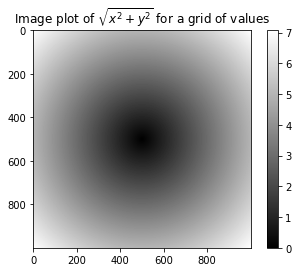

In [79]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

函数值（一个二维数组）的图形化结果。这张图是用matplotlib的imshow函数创建的。

# 将条件逻辑表述为数组运算

numpy.where函数是三元表达式`x if condition else y`的矢量化版本

In [80]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond  = np.array([True, False, True, True, False])

假设我们想根据cond中的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则year中选取。列表推导式的写法如下：

In [81]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

这有几个问题。第一，他对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写的非常简洁：

In [82]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where的第二个和第三个参数不必是数组，他们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个由随机数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为-2,。

In [83]:
arr = np.random.randn(4,4)
arr

array([[ 0.25251962,  1.58632647,  0.06066189, -1.7400174 ],
       [ 0.17488008,  0.51909178, -0.35213732, -1.45219855],
       [-0.49760349,  1.15905976,  1.04795511, -0.72546502],
       [ 1.14794387,  1.39678167, -0.3263988 ,  0.15920899]])

In [84]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [ 2,  2, -2, -2],
       [-2,  2,  2, -2],
       [ 2,  2, -2,  2]])

In [85]:
np.where(arr > 0, 2, arr)  # 只将正值设置为2

array([[ 2.        ,  2.        ,  2.        , -1.7400174 ],
       [ 2.        ,  2.        , -0.35213732, -1.45219855],
       [-0.49760349,  2.        ,  2.        , -0.72546502],
       [ 2.        ,  2.        , -0.3263988 ,  2.        ]])

传递给where的数组大小可以不相等，甚至可以是标量值。<br>
只有稍微动动脑子，你就能用where表述出更为复杂的逻辑。想象一下这样一个例子，我们有两个布尔型数组cond1和cond2，希望根据4种不同的布尔值组合实现不同的赋值操作：

这部分内容有问题。。。。。。

In [86]:
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

NameError: name 'n' is not defined

In [87]:
np.where(cond1 & cond2, 0, np.where(cond1, 1, np.where(cond2, 2, 3)))

NameError: name 'cond1' is not defined

# 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum，mean以及标准差std等聚合计算既可以当做数组的实例方法，也可以当做顶级NumPy函数使用：

In [88]:
arr = np.random.randn(5, 4)
arr

array([[-0.83460584,  0.02317193,  0.36219981,  0.66053059],
       [-0.9796324 , -0.60725337,  1.09872179,  0.82852926],
       [-2.94593822,  0.58279681, -1.109962  , -1.17483474],
       [-1.25061463, -1.3573771 ,  0.45870404,  0.14947746],
       [ 1.16216469, -0.7775673 ,  1.53453745, -0.74940654]])

In [89]:
arr.mean()

-0.24631791545314705

In [90]:
np.mean(arr)

-0.24631791545314705

In [91]:
arr.sum()

-4.926358309062941

mean和sum这类的函数可以接受一个axis参数（用于计算该轴向上的统计值），最终结果是一个少一维的数组：

In [92]:
arr.mean(axis=1)

array([ 0.05282412,  0.08509132, -1.16198454, -0.49995256,  0.29243208])

In [93]:
arr.sum(0)

array([-4.8486264 , -2.13622903,  2.3442011 , -0.28570398])

其他如cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组：

In [94]:
arr = np.array([[0,1,3], [3,4,5], [6,7,8]])
arr

array([[0, 1, 3],
       [3, 4, 5],
       [6, 7, 8]])

In [95]:
arr.cumsum(0)

array([[ 0,  1,  3],
       [ 3,  5,  8],
       [ 9, 12, 16]], dtype=int32)

In [96]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

# 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常用来对布尔型数组中的True值计算

In [97]:
arr = np.random.randn(100)
arr

array([ 1.29087127, -0.47931131,  0.68554943,  1.53028502,  1.61143471,
       -0.60522651,  0.79349584, -0.26371839,  0.23957987,  2.10643105,
        0.39575767, -0.34707151, -0.03009757, -1.40199858, -0.6975036 ,
        1.09528351,  1.51766355,  0.78802609,  1.19763481,  1.1834953 ,
       -0.06590834,  0.05862467, -0.01168495, -1.49015451, -0.67472181,
       -0.82821367,  0.6193288 ,  0.56770613,  1.42502643,  0.08656354,
       -0.83482695, -0.35710678, -0.00935888, -0.71460693, -0.64826321,
        2.49840346,  0.73489389, -1.80919344,  0.22982687, -0.11386562,
       -0.13659754, -1.96556234,  0.0673794 , -0.40809763,  1.47519212,
       -0.345442  , -0.23156438,  1.29725696, -0.62326406,  1.19036225,
       -0.61688929, -1.39707433,  0.67417432, -0.42892194,  0.08420592,
        0.85091055, -0.04265954, -0.05856703,  1.49542419, -0.91681824,
        0.60536929, -0.19758701, -0.48077074, -0.02944599,  1.05746784,
       -1.43474918,  0.60514785,  0.41674018, -1.27024704, -1.82

In [98]:
(arr > 0).sum()

44

另外还有两个方法any和all，它们对布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True

In [99]:
bools = np.array([False, False, True, False])
bools.any()

True

In [100]:
bools.all()

False

这两个方法也能用于非布尔型数组，所有非0元素将会被当做True

## 排序

跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地排序

In [101]:
arr = np.random.randn(8)
arr

array([-0.41800337,  0.25585714, -0.7999574 , -0.81601125,  0.18974532,
        0.83949894,  0.59676529,  0.09953704])

In [102]:
arr.sort()
arr

array([-0.81601125, -0.7999574 , -0.41800337,  0.09953704,  0.18974532,
        0.25585714,  0.59676529,  0.83949894])

多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可

In [103]:
arr = np.random.randn(5, 3)
arr

array([[-0.26380413,  0.0100133 ,  1.60402836],
       [-0.79955292, -0.84152977, -2.43531507],
       [ 0.95461626,  1.57879917, -0.0771737 ],
       [ 0.76565918,  1.20521758, -1.24218932],
       [-0.57808272, -1.21494166, -0.95174487]])

In [106]:
arr.sort(1)
arr

array([[-0.26380413,  0.0100133 ,  1.60402836],
       [-2.43531507, -0.84152977, -0.79955292],
       [-0.0771737 ,  0.95461626,  1.57879917],
       [-1.24218932,  0.76565918,  1.20521758],
       [-1.21494166, -0.95174487, -0.57808272]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改整组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [107]:
large_arr = np.random.randn(1000)

In [108]:
large_arr.sort()

In [109]:
large_arr[int(0.05 * len(large_arr))]  # 5%分位数

-1.6873695241831268

# 唯一化以及其他的集合逻辑

NumPy提供了一些针对一维nadarry的基本集合运算。最常用的可能要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果：

In [110]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [111]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [112]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [114]:
np.unique(ints)

array([1, 3, 4])

另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [115]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

# 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。后面的章节将使用pandas读取数据。

## 将数组以二进制格式保存到磁盘

np.save和np.load是读写磁盘数组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中。

In [116]:
arr = np.arange(10)
np.save('some_array', arr)

如果文件路径末尾没有扩展名.npy，则改扩展名会被自动加上。然后就可以通过np.load读取磁盘上的数组：

In [117]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过np.savez可以将多个数组保存到一个压缩文件中，将数组以关键字参数的形式传入即可：

In [118]:
np.savez('array_archive.npz', a=arr, b=arr)

加载.npz文件时，你会得到一个类似字典的对象，该对象会对各个数组进行延迟加载：

In [119]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 存取文本文件

从文件中加载文本是一个非常标准的认为。Python中的文件读写函数的格式很容易将新手搞晕，所以我将主要介绍pandas中的read_csv和read_table函数。有时，我们需要用np.loadtxt或更为专门化的np.genfromtxt将数据加载到普通的NumPy数组中。<br>
这些函数都有许多选项可供使用：指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等。以一个简单的逗号分隔文件（CSV）为例：

In [120]:
arr = np.loadtxt('array_ex.txt', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

# 线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。不想某些语言，通过`*`对两个数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此，NumPy提供了一个用于矩阵乘法的dot函数：

In [121]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])

In [122]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [123]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [124]:
x.dot(y)  # 相当于 np.dot(x, y)

array([[ 28,  64],
       [ 67, 181]])

一个二维数组跟一个大小合适的一维数组的矩阵点积运算之后将会得到一个一维数组：

In [125]:
np.dot(x, np.ones(3))

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。它们跟MATLAB和R等语言所使用的是相同的行业标准件Fortran库

In [127]:
X = np.random.randn(5, 5)
X

array([[-1.73944583, -1.4945787 ,  0.01904178, -0.87000777,  1.23971113],
       [-0.39943337, -0.54102269, -0.73147759, -0.24543164,  0.33463199],
       [-0.4926224 , -0.83414461,  0.27856586,  0.05098957,  0.06447116],
       [-0.14780572,  0.22684915, -1.39648538, -0.63252934, -1.63877244],
       [-0.56434168,  1.15898489,  2.48338461,  0.85959717,  1.16251885]])

In [128]:
mat = X.T.dot(X)

In [129]:
inv(mat)

array([[ 2.64834235, -0.49325342,  2.11313691, -4.50919359,  0.02645133],
       [-0.49325342,  1.06938955, -0.77720374,  0.05577643,  0.64241232],
       [ 2.11313691, -0.77720374,  2.7039596 , -4.44506323, -0.81255832],
       [-4.50919359,  0.05577643, -4.44506323, 10.3926642 ,  0.12282448],
       [ 0.02645133,  0.64241232, -0.81255832,  0.12282448,  1.00511643]])

In [130]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.06325364e-17, -1.51555288e-16,
         3.53690959e-16, -1.64983324e-16],
       [-4.99760223e-16,  1.00000000e+00, -1.07497020e-15,
        -3.89607177e-15,  2.25331295e-17],
       [ 5.17785799e-16,  2.32273547e-16,  1.00000000e+00,
        -2.76959039e-15,  7.25351206e-16],
       [-1.05746630e-15, -1.25742156e-16, -7.19324475e-16,
         1.00000000e+00, -6.59420799e-17],
       [ 2.34986104e-15, -3.77170562e-16,  2.23336077e-15,
        -1.71956170e-15,  1.00000000e+00]])

In [131]:
q, r = qr(mat)

In [132]:
r

array([[ -5.54163937,  -4.35246943,   2.9509459 ,  -1.2099958 ,
          5.95229936],
       [  0.        ,  -4.72855767, -10.09736938,  -4.26276465,
         -4.83790356],
       [  0.        ,   0.        ,  -2.98493286,  -1.27856108,
         -2.6908464 ],
       [  0.        ,   0.        ,   0.        ,  -0.08557785,
          0.20093395],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.6902317 ]])

# 随机数生成

numpy.random模块对Python内置的random进行了补充，增加了一些用于高效生成多种概率分布的样本值的函数。

In [133]:
# 正太分布随机数
samples = np.random.normal(size=(4,4))
samples

array([[ 0.17836269, -0.68774001, -1.05015176,  0.43120141],
       [ 1.53489286, -0.67739051,  2.13075462, -0.50459422],
       [-0.71470664,  0.04970295, -0.72010511, -1.19009997],
       [ 0.42768802,  0.77073536, -2.50896542, -0.72745595]])

而Python内置的random模块则只能一次生成一个样本值。从下面的测试结果中可以看出，如果需要产生大量样本值，numpy.random快了不止一个数量级：

In [135]:
N = 1000000

In [137]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

966 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [138]:
%timeit np.random.normal(size=N)

34.4 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 范例：随机漫步

我们通过模拟随机漫步来说明如何运用数组运算。先来看一下简单的随机漫步的例子：从0开始，步长1和-1出现的概率相等。我们通过内置的ruandom模块一纯Python的方式实现1000步的随机漫步：

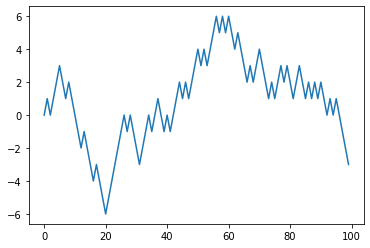

In [3]:
# random模块随机漫步
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100])

不难看出，这其实就是随机漫步中各步的累计和，可以用一个数组运算来实现。因此，我用np.random模块一次性随机产生1000个‘投硬币’结果（即两个数中任选一个），将其分别设置为1或-1，然后计算累计和

In [141]:
# 数组运算实现
nsteps = 1000 
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-6

In [142]:
walk.max()

37

现在来看一个复杂点的统计任务——首次穿越时间，即随机漫步过程第一次到达某个特定时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点至少10步远（任意方向均可）。np.abs（walk）>= 10可以得到一个布尔型数组，它表示的是距离是否达到或超过10，而我们想要知道的是第一个10或-10的索引。可以用argmax来解决这个问题，它返回的是该布尔型数组第一个最大值的索引（True就是最大值）

In [4]:
(np.abs(walk) >= 10).argmax()

108

注意，这里使用argmax并不是很高效，因为它是无论如何都会对数组进行完全扫描。在本例中，只要发现了一个True，那我们就知道它是个最大值了。

## 一次模拟多个随机漫步

如果你希望模拟多个随机漫步过程（比如5000个），只需要对上面的代码做一点点修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程（一行一个）的累计和：

In [9]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [10]:
walks

array([[  1,   0,   1, ...,   2,   3,   2],
       [  1,   0,  -1, ...,   6,   5,   4],
       [  1,   0,  -1, ...,  44,  43,  44],
       ...,
       [ -1,  -2,  -3, ..., -30, -31, -32],
       [  1,   0,   1, ..., -30, -29, -28],
       [ -1,   0,  -1, ...,   8,   9,  10]], dtype=int32)

In [11]:
walks.max()

111

In [12]:
walks.min()

-106

得到这些数据之后，我们来计算30或-30的最小穿越时间。这里要稍微动一下脑筋，因为不是5000个过程都到达了30.我们可以用any方法来对此进行检查：

In [13]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ...,  True,  True,  True])

In [14]:
hits30.sum()

3362

然后我们利用这个布尔型数组选出哪些穿越了30（绝对值）的随机漫步行，并调用argmax在轴1伤获取穿越时间：

In [15]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

507.2379535990482

请尝试用其他分布方式得到漫步数据。只需使用不同的随机数生成函数即可，如normal用于生成指定均值和标准差的正态分布数据：

In [16]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))